In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,roc_auc_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_test = pd.read_csv("Test_data.csv")
X_test = df_test.drop(["Target"],axis = 1)
y_test = df_test["Target"]

In [3]:
df_train = pd.read_csv("Train_data.csv")
X_train = df_train.drop(["Target"],axis = 1)
y_train= df_train["Target"]

In [4]:
y_train.value_counts()

0    2442
1    1280
Name: Target, dtype: int64

In [5]:
columns = X_train.columns

In [6]:
columns

Index(['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain',
       'Education_Bachelors', 'Education_Masters', 'Education_PHD',
       'City_Bangalore', 'City_New Delhi', 'City_Pune', 'Gender_Male',
       'EverBenched_Yes'],
      dtype='object')

In [7]:
logisticRegr = LogisticRegression()

In [8]:
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2',None],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

In [9]:
grid_search = GridSearchCV(logisticRegr, param_grid, cv=5,scoring='roc_auc')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='roc_auc')

In [10]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(best_params,best_score)

{'C': 1, 'penalty': 'l1', 'solver': 'saga'} 0.7320390565415578


In [11]:
logisticRegr.set_params(**best_params)

LogisticRegression(C=1, penalty='l1', solver='saga')

In [12]:
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1, penalty='l1', solver='saga')

<AxesSubplot:ylabel='Feature'>

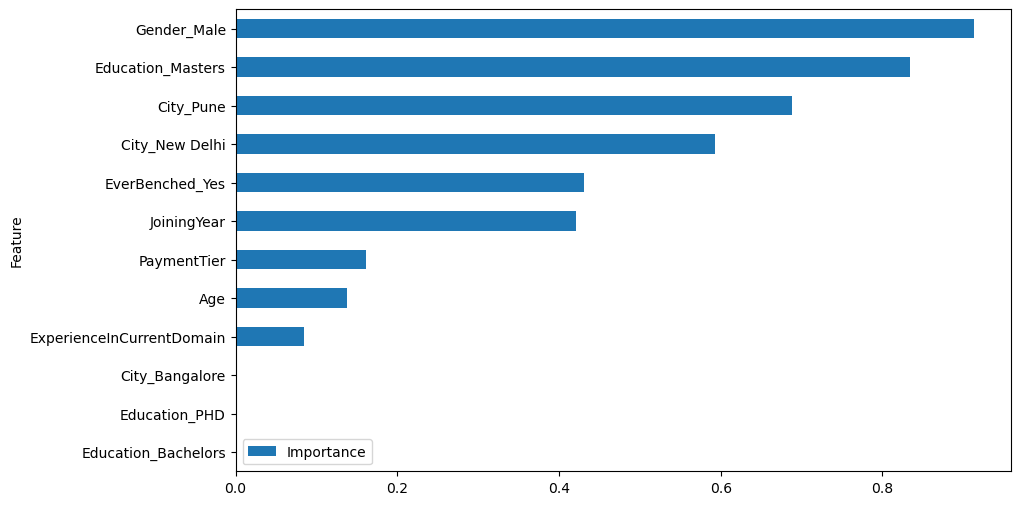

In [13]:
coefficients = logisticRegr.coef_[0]

feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [14]:
feature_importance[feature_importance['Importance'] < 0.1]['Feature'].to_list()

['Education_Bachelors',
 'Education_PHD',
 'City_Bangalore',
 'ExperienceInCurrentDomain']

In [15]:
# predicting the output for the test dataset
predictions = logisticRegr.predict(X_test)

In [16]:
accuracy_score(y_test,predictions)

0.7303974221267454

In [17]:
report = classification_report(y_test, predictions)

# Print the report
print(report)

confusion_matrix(y_test,predictions)

              precision    recall  f1-score   support

           0       0.75      0.89      0.81       611
           1       0.67      0.42      0.52       320

    accuracy                           0.73       931
   macro avg       0.71      0.66      0.67       931
weighted avg       0.72      0.73      0.71       931



array([[544,  67],
       [184, 136]], dtype=int64)

In [18]:
metrics = {
    'Precision': precision_score(y_test, predictions),
    'Recall': recall_score(y_test, predictions),
    'AUC': roc_auc_score(y_test, predictions),
    'F1 Score': f1_score(y_test, predictions),
    'Accuracy': accuracy_score(y_test, predictions)
}

for metric, value in metrics.items():
    print(f'{metric}: {value:.2f}')

Precision: 0.67
Recall: 0.42
AUC: 0.66
F1 Score: 0.52
Accuracy: 0.73


## Dropping Features

In [19]:
#based on feature importance , we are going to drop 3 least importance features
feature_to_drop = feature_importance[feature_importance['Importance'] < 0.1]['Feature'].to_list()
X_train_new = X_train.drop(feature_to_drop,axis=1)
X_test_new  = X_test.drop(feature_to_drop,axis=1)

In [20]:
param_grid = {
    'C': [0.0001,0.001, 0.01, 0.1, 1, 10, 100,1000],
    'penalty': ['l1', 'l2','elasticnet',None],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter' : [100,500,1000]
}

In [21]:
grid_search = GridSearchCV(logisticRegr, param_grid, cv=5,scoring='roc_auc')
grid_search.fit(X_train_new, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(C=1, penalty='l1', solver='saga'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [100, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='roc_auc')

In [22]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(best_params,best_score)

{'C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'} 0.7317324128391205


In [23]:
logisticRegr.set_params(**best_params)

LogisticRegression(C=100, penalty='l1', solver='saga')

In [24]:
logisticRegr.fit(X_train_new, y_train)

LogisticRegression(C=100, penalty='l1', solver='saga')

<AxesSubplot:ylabel='Feature'>

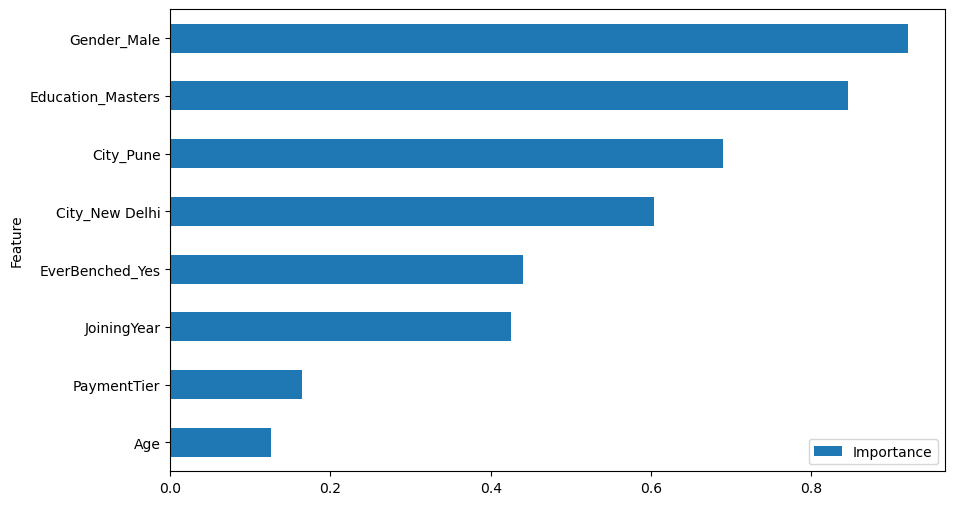

In [25]:
coefficients = logisticRegr.coef_[0]

feature_importance = pd.DataFrame({'Feature': X_train_new.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [26]:
# predicting the output for the test dataset
predictions = logisticRegr.predict(X_test_new)

In [27]:
accuracy_score(y_test,predictions)

0.7368421052631579

In [28]:
report = classification_report(y_test, predictions)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.75      0.90      0.82       611
           1       0.68      0.43      0.53       320

    accuracy                           0.74       931
   macro avg       0.72      0.66      0.67       931
weighted avg       0.73      0.74      0.72       931



In [29]:
confusion_matrix(y_test,predictions)

array([[547,  64],
       [181, 139]], dtype=int64)

In [30]:
metrics = {
    'Precision': precision_score(y_test, predictions),
    'Recall': recall_score(y_test, predictions),
    'AUC': roc_auc_score(y_test, predictions),
    'F1 Score': f1_score(y_test, predictions),
    'Accuracy': accuracy_score(y_test, predictions)
}

for metric, value in metrics.items():
    print(f'{metric}: {value:.2f}')

Precision: 0.68
Recall: 0.43
AUC: 0.66
F1 Score: 0.53
Accuracy: 0.74
